In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [23]:
train_data=pd.read_csv('dataset/train.csv')

In [49]:
train_data.head()
#'Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral'

,emotion,pixels
0,0,"[70.0, 80.0, 82.0, 72.0, 58.0, 58.0, 60.0, 63...."
1,0,"[151.0, 150.0, 147.0, 155.0, 148.0, 133.0, 111..."
2,2,"[231.0, 212.0, 156.0, 164.0, 174.0, 138.0, 161..."
3,4,"[24.0, 32.0, 36.0, 30.0, 32.0, 23.0, 19.0, 20...."
4,6,"[4.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."


In [25]:
train_data.shape

(28709, 2)

In [26]:
e_prop = (train_data.emotion.value_counts() / len(train_data)).to_frame().sort_index(ascending=True)

In [27]:
emotions = ['Angry','Disgust','Fear','Happy','Sad','Surprise','Neutral']

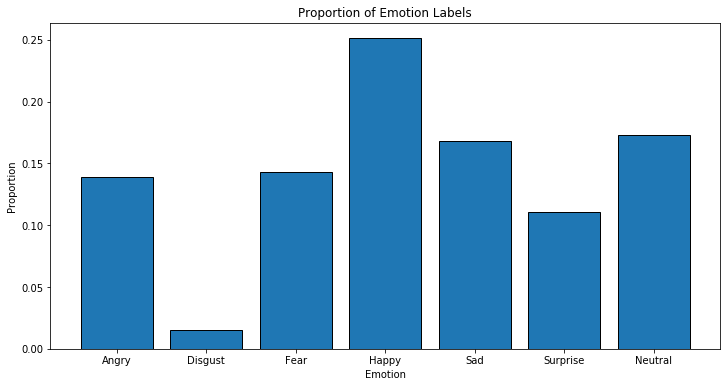

In [28]:
plt.figure(figsize=[12,6])
plt.bar(x=emotions, height=e_prop['emotion'], edgecolor='black')
plt.xlabel('Emotion')
plt.ylabel('Proportion')
plt.title('Proportion of Emotion Labels')
plt.show()

In [29]:
def pixels_to_array(pixels):
    array = np.array(pixels.split(),'float64')
    return array

def image_reshape(data):
    image = np.reshape(data['pixels'].to_list(),(data.shape[0],48,48,1))
    return image

In [30]:
train_data['pixels'] = train_data['pixels'].apply(pixels_to_array)
train_data['pixels']
X = image_reshape(train_data)
y = train_data['emotion']

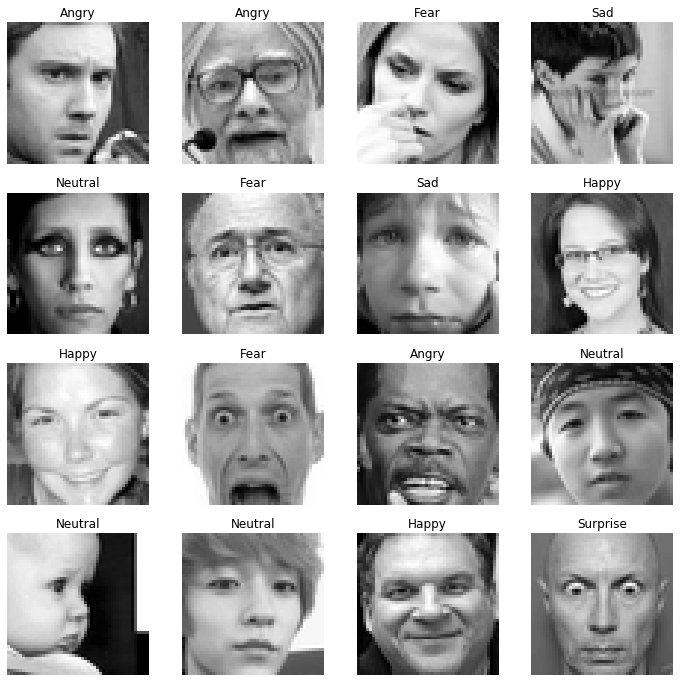

In [11]:
plt.figure(figsize=[12,12])
for i in range(16):
    plt.subplot(4,4,i+1)
    plt.imshow(X[i],cmap="gray")
    plt.title(emotions[y[i]])
    plt.axis("off")
plt.show()

In [40]:
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=1)

In [36]:
X_train.shape, X_valid.shape, y_train.shape, y_valid.shape

((22967, 48, 48, 1), (5742, 48, 48, 1), (22967,), (5742,))

In [47]:
np.random.seed(1)
tf.random.set_seed(1)

cnn = Sequential([
    
    Conv2D(64, (3,3), activation = 'relu', padding = 'same', input_shape=(48,48,1)),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    
    MaxPooling2D(2,2),
    Dropout(0.25),
    BatchNormalization(),

    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(128, (3,3), activation = 'relu', padding = 'same'),
    
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),
    
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    Conv2D(64, (3,3), activation = 'relu', padding = 'same'),
    
    MaxPooling2D(2,2),
    Dropout(0.5),
    BatchNormalization(),

    Flatten(),
    
    Dense(128, activation='relu'),
    Dropout(0.5),
    
    Dense(64, activation='relu'),
    Dropout(0.25),
    
    BatchNormalization(),
    
    Dense(7, activation='softmax')
])

In [15]:
cnn

In [16]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 48, 48, 64)        640       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 48, 48, 64)        36928     
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 24, 24, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 128)       73856     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 24, 24, 128)       1

In [48]:
opt = tf.keras.optimizers.Adam(0.001)
cnn.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [38]:
y_train=np.asarray(y_train)
y_valid=np.asarray(y_valid)

In [19]:
type(X_train),type(y_train),type(X_valid),type(y_valid)

(numpy.ndarray, numpy.ndarray, numpy.ndarray, numpy.ndarray)

In [ ]:
%%time 

h1 = cnn.fit(
    X_train, y_train, 
    batch_size=256,
    epochs = 20,
    verbose = 1,
    validation_data = (X_valid, y_valid)
)

In [ ]:
cnn.save('model.h5')

In [41]:
(X_valid[5].shape)

(48, 48, 1)

In [42]:
X_train[0].size

2304

In [ ]:
y_valid[5].shape

In [ ]:
from tensorflow import keras

In [ ]:
mod=keras.models.load_model('model.h5')

In [ ]:
mod
tmp=np.array([X_valid[5]])

In [ ]:
mod.predict(tmp)

In [ ]:
plt.imshow(tmp[0].reshape(48,48))

In [ ]:
from PIL import Image
img = Image.open('dataset/t.jpg')
imageToMatrice = np.asarray(img)

In [ ]:
print(imageToMatrice.shape)

In [ ]:
import cv2
originalImage = cv2.imread('dataset/t-min.jpeg')
grayImage = cv2.cvtColor(originalImage, cv2.COLOR_BGR2GRAY)
a = np.asarray(grayImage)

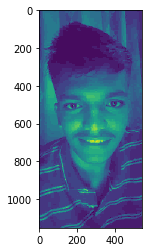

In [44]:
plt.imshow(a)

In [ ]:
mod.predict(temp)

In [ ]:
mod.summary()